In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
#from pandas_profiling import ProfileReport

In [2]:
account_df = pd.read_csv('../Cubes/Data/Account.csv')
client_df = pd.read_csv('../Cubes/Data/Client.csv')
date_df = pd.read_csv('../Cubes/Data/Date.csv')
district_df = pd.read_csv('../Cubes/Data/District.csv')
type_df = pd.read_csv('../Cubes/Data/Type.csv')
operations_df = pd.read_csv('../Cubes/Data/Operations.csv')
orders_df = pd.read_csv('../Cubes/Data/Orders.csv')

In [3]:
operations_df.head()

operation_id  type_id  date_id  account_key  receiver  client_id  \
0             1        1      258         4491         1      13845   
1             2        1      343         4174         1       8598   
2             3        1      350         4315         1      11126   
3             4        1      355         4338         1      11372   
4             5        1      375         2367         1       3001   

   district_id  client_district_id  amount  amount_avg  quantity  
0           15                  15   52788       52788         1  
1           64                  46   47016       47016         1  
2            1                   1   38148       38148         1  
3           11                  11   86616       86616         1  
4            1                   1   24516       24516         1

In [4]:
type_df.head()

type_id      type transaction_type transaction_op k_symbol  loan_duration  \
0        1  Prestamo              NaN            NaN      NaN           12.0   
1        2  Prestamo              NaN            NaN      NaN           12.0   
2        3  Prestamo              NaN            NaN      NaN           12.0   
3        4  Prestamo              NaN            NaN      NaN           12.0   
4        5  Prestamo              NaN            NaN      NaN           24.0   

  loan_status  
0           A  
1           B  
2           C  
3           D  
4           A

In [5]:
account_df.head()

account_key  account_id  district_id bank  extraction_freq  start_date  \
0            1          -1         -1.0   BI              NaN  1990-01-01   
1            2           1         18.0   BI  Emision Mensual  1990-01-01   
2            3           2          1.0   BI  Emision Mensual  1990-01-01   
3            4           3          5.0   BI  Emision Mensual  1990-01-01   
4            5           4         12.0   BI  Emision Mensual  1990-01-01   

     end_date created_date  
0  2012-05-21   1990-01-01  
1  2012-05-21   1995-03-24  
2  2012-05-21   1993-02-26  
3  2012-05-21   1997-07-07  
4  2012-05-21   1996-02-21

In [6]:
date_df.head()

date_id  day_val  month_val  year_val  semester_val
0        1        1          1      1993             1
1        2        2          1      1993             1
2        3        3          1      1993             1
3        4        4          1      1993             1
4        5        5          1      1993             1

In [7]:
district_df.head()

district_id  unemployment_rate_95  unemployment_rate_96  \
0            1                  0.29                  0.43   
1           10                  0.56                  0.54   
2           11                  0.45                  0.59   
3           12                  3.83                  4.31   
4           13                  2.77                  3.26   

   entrepreneur_num1000    end_date  crimes_num_95  crimes_num_96  start_date  \
0                   167  2021-01-21          85677          99107  1990-01-01   
1                   141  2021-01-21           3810           4316  1990-01-01   
2                   154  2021-01-21           3475           3529  1990-01-01   
3                   137  2021-01-21           3804           3868  1990-01-01   
4                   123  2021-01-21           1597           1875  1990-01-01   

    district_name  inhabitants_num  municipality_num499  \
0     Hl.m. Praha          1204953                    0   
1  Praha - vychod            92084                   55   
2   Praha - zapad            75637                   35   
3         Pribram           107870                   84   
4        Rakovnik            53921                   61   

   municipality_num499_1999  municipality_num2000_9999  municipality_num10000  \
0                         0                          0                      1   
1                        29                          4                      3   
2                        36                          9                      0   
3                        29                          6                      1   
4                        22                          1                      1   

   city_num           region  urban_inhabitants_proportion  medium_salary  
0         1           Prague                         100.0          12541  
1         5  central Bohemia                          46.7          10124  
2         7  central Bohemia                          36.5           9622  
3         6  central Bohemia                          58.0           8754  
4         2  central Bohemia                          41.3           8598

In [8]:
client_df.head()

client_id  district_id  gender  age   age_levels  card_num card_type  \
0          1           18  FEMALE   29        ADULT       NaN       NaN   
1          2            1    MALE   54  MIDDLE AGED       NaN       NaN   
2          3            1  FEMALE   59  MIDDLE AGED       NaN       NaN   
3          4            5    MALE   43  MIDDLE AGED       NaN       NaN   
4          5            5  FEMALE   39  MIDDLE AGED       NaN       NaN   

  card_emission_date account_owner  
0                NaN         OWNER  
1                NaN         OWNER  
2                NaN     DISPONENT  
3                NaN         OWNER  
4                NaN     DISPONENT

In [9]:
orders_df.head()

order_id  type_id  account_key  receiver  client_id  district_id  \
0         1       21            4      6560          4            5   
1         2       21            9     12006         10           57   
2         3       21           25      8195         30           74   
3         4       21           26     10983         31           68   
4         5       21           29     11998         36            7   

   client_district_id  amount  amount_avg  quantity  
0                   5     327         327         1  
1                  57    6712        6712         1  
2                  74    7641        7641         1  
3                  68    1110        1110         1  
4                   7     829         829         1

In [10]:
merged_data = operations_df.merge(type_df,on='type_id')

Contamos la cantidad de transacciones que se han hecho desde cada cuenta, el monto total de las mismas, (y si llegamos, tambien podriamos hacer la frecuencia entre las transacciones)


In [11]:
transaction_data = merged_data[merged_data['type'] == 'Transaccion']
transaction_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
682               683       26        5          757      5004        950   
683               684       26        7         1760      8018       2236   
684               685       26       14         4033     11014       6367   
685               686       26       36          358      4808        454   
686               687       26       36          757      5004        950   
...               ...      ...      ...          ...       ...        ...   
1039481       1039482       40     2190         4103         1       7325   
1039482       1039483       40     2190         4147         1       8089   
1039483       1039484       40     2190         4233         1       9775   
1039484       1039485       40     2190         4332         1      11329   
1039485       1039486       40     2190         4404         1      12432   

         district_id  client_district_id  amount  amount_avg  quantity  \
682               47                  76    3401        3401         1   
683               44                  44    3242        3242         1   
684               44                  44   44749       44749         1   
685               38                  38   23041       23041         1   
686               47                  76    3401        3401         1   
...              ...                 ...     ...         ...       ...   
1039481           24                  24   14988       14988         1   
1039482           35                  35   17897       17897         1   
1039483           70                  70    4842        4842         1   
1039484           69                  69   17159       17159         1   
1039485           55                  55   22038       22038         1   

                type    transaction_type           transaction_op k_symbol  \
682      Transaccion             Credito  Coleccion de otro banco      NaN   
683      Transaccion             Credito  Coleccion de otro banco      NaN   
684      Transaccion             Credito  Coleccion de otro banco      NaN   
685      Transaccion             Credito  Coleccion de otro banco      NaN   
686      Transaccion             Credito  Coleccion de otro banco      NaN   
...              ...                 ...                      ...      ...   
1039481  Transaccion  Retiro en Efectivo       Retiro en efectivo      NaN   
1039482  Transaccion  Retiro en Efectivo       Retiro en efectivo      NaN   
1039483  Transaccion  Retiro en Efectivo       Retiro en efectivo      NaN   
1039484  Transaccion  Retiro en Efectivo       Retiro en efectivo      NaN   
1039485  Transaccion  Retiro en Efectivo       Retiro en efectivo      NaN   

         loan_duration loan_status  
682                NaN         NaN  
683                NaN         NaN  
684                NaN         NaN  
685                NaN         NaN  
686                NaN         NaN  
...                ...         ...  
1039481            NaN         NaN  
1039482            NaN         NaN  
1039483            NaN         NaN  
1039484            NaN         NaN  
1039485            NaN         NaN  

[1038804 rows x 17 columns]

In [12]:
merged_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
0                   1        1      258         4491         1      13845   
1                   2        1      343         4174         1       8598   
2                   3        1      350         4315         1      11126   
3                   4        1      355         4338         1      11372   
4                   5        1      375         2367         1       3001   
...               ...      ...      ...          ...       ...        ...   
1039481       1039482       40     2190         4103         1       7325   
1039482       1039483       40     2190         4147         1       8089   
1039483       1039484       40     2190         4233         1       9775   
1039484       1039485       40     2190         4332         1      11329   
1039485       1039486       40     2190         4404         1      12432   

         district_id  client_district_id  amount  amount_avg  quantity  \
0                 15                  15   52788       52788         1   
1                 64                  46   47016       47016         1   
2                  1                   1   38148       38148         1   
3                 11                  11   86616       86616         1   
4                  1                   1   24516       24516         1   
...              ...                 ...     ...         ...       ...   
1039481           24                  24   14988       14988         1   
1039482           35                  35   17897       17897         1   
1039483           70                  70    4842        4842         1   
1039484           69                  69   17159       17159         1   
1039485           55                  55   22038       22038         1   

                type    transaction_type      transaction_op k_symbol  \
0           Prestamo                 NaN                 NaN      NaN   
1           Prestamo                 NaN                 NaN      NaN   
2           Prestamo                 NaN                 NaN      NaN   
3           Prestamo                 NaN                 NaN      NaN   
4           Prestamo                 NaN                 NaN      NaN   
...              ...                 ...                 ...      ...   
1039481  Transaccion  Retiro en Efectivo  Retiro en efectivo      NaN   
1039482  Transaccion  Retiro en Efectivo  Retiro en efectivo      NaN   
1039483  Transaccion  Retiro en Efectivo  Retiro en efectivo      NaN   
1039484  Transaccion  Retiro en Efectivo  Retiro en efectivo      NaN   
1039485  Transaccion  Retiro en Efectivo  Retiro en efectivo      NaN   

         loan_duration loan_status  
0                 12.0           A  
1                 12.0           A  
2                 12.0           A  
3                 12.0           A  
4                 12.0           A  
...                ...         ...  
1039481            NaN         NaN  
1039482            NaN         NaN  
1039483            NaN         NaN  
1039484            NaN         NaN  
1039485            NaN         NaN  

[1039486 rows x 17 columns]

In [13]:
quantity_transactions_per_client= transaction_data.groupby(['account_key'])['quantity'].sum()

In [14]:
quantity_transactions_per_client

account_key
2       239
3       478
4       117
5       186
6        84
       ... 
4499    368
4500    304
4501    378
4502    344
4503    253
Name: quantity, Length: 4500, dtype: int64

operation_id  type_id  date_id  account_key  receiver  client_id  \
0               1        1      258         4491         1      13845   
1               2        1      343         4174         1       8598   
2               3        1      350         4315         1      11126   
3               4        1      355         4338         1      11372   
4               5        1      375         2367         1       3001   
..            ...      ...      ...          ...       ...        ...   
677           678       20     1751         4248         1       9987   
678           679       20     1770         3528         1       4474   
679           680       20     1777         2221         1       2823   
680           681       20     1795         4461         1      13346   
681           682       20     2113           37         1         45   

     district_id  client_district_id  amount  amount_avg  quantity      type  \
0             15                  15   52788       52788         1  Prestamo   
1             64                  46   47016       47016         1  Prestamo   
2              1                   1   38148       38148         1  Prestamo   
3             11                  11   86616       86616         1  Prestamo   
4              1                   1   24516       24516         1  Prestamo   
..           ...                 ...     ...         ...       ...       ...   
677           73                  73  260400      260400         1  Prestamo   
678            3                   3  460980      460980         1  Prestamo   
679           70                  70  541200      541200         1  Prestamo   
680           50                  50  385560      385560         1  Prestamo   
681           20                  20  318480      318480         1  Prestamo   

    transaction_type transaction_op k_symbol  loan_duration loan_status  
0                NaN            NaN      NaN           12.0           A  
1                NaN            NaN      NaN           12.0           A  
2                NaN            NaN      NaN           12.0           A  
3                NaN            NaN      NaN           12.0           A  
4                NaN            NaN      NaN           12.0           A  
..               ...            ...      ...            ...         ...  
677              NaN            NaN      NaN           60.0           D  
678              NaN            NaN      NaN           60.0           D  
679              NaN            NaN      NaN           60.0           D  
680              NaN            NaN      NaN           60.0           D  
681              NaN            NaN      NaN           60.0           D  

[682 rows x 17 columns]

In [16]:
merged_data = merged_data.merge(quantity_transactions_per_client,how='inner', on='account_key')

In [17]:
merged_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
0               1        1      258         4491         1      13845   
1               2        1      343         4174         1       8598   
2               3        1      350         4315         1      11126   
3               4        1      355         4338         1      11372   
4               5        1      375         2367         1       3001   
..            ...      ...      ...          ...       ...        ...   
677           678       20     1751         4248         1       9987   
678           679       20     1770         3528         1       4474   
679           680       20     1777         2221         1       2823   
680           681       20     1795         4461         1      13346   
681           682       20     2113           37         1         45   

     district_id  client_district_id  amount  amount_avg  quantity_x  \
0             15                  15   52788       52788           1   
1             64                  46   47016       47016           1   
2              1                   1   38148       38148           1   
3             11                  11   86616       86616           1   
4              1                   1   24516       24516           1   
..           ...                 ...     ...         ...         ...   
677           73                  73  260400      260400           1   
678            3                   3  460980      460980           1   
679           70                  70  541200      541200           1   
680           50                  50  385560      385560           1   
681           20                  20  318480      318480           1   

         type transaction_type transaction_op k_symbol  loan_duration  \
0    Prestamo              NaN            NaN      NaN           12.0   
1    Prestamo              NaN            NaN      NaN           12.0   
2    Prestamo              NaN            NaN      NaN           12.0   
3    Prestamo              NaN            NaN      NaN           12.0   
4    Prestamo              NaN            NaN      NaN           12.0   
..        ...              ...            ...      ...            ...   
677  Prestamo              NaN            NaN      NaN           60.0   
678  Prestamo              NaN            NaN      NaN           60.0   
679  Prestamo              NaN            NaN      NaN           60.0   
680  Prestamo              NaN            NaN      NaN           60.0   
681  Prestamo              NaN            NaN      NaN           60.0   

    loan_status  quantity_y  
0             A         484  
1             A         470  
2             A         611  
3             A         561  
4             A         534  
..          ...         ...  
677           D         232  
678           D         101  
679           D         329  
680           D         158  
681           D         130  

[682 rows x 18 columns]

In [18]:
merged_data = merged_data.merge(date_df,on='date_id')
merged_data['quantity_y']

0      484
1      470
2      611
3      561
4      534
      ... 
677    173
678    232
679    101
680    329
681    130
Name: quantity_y, Length: 682, dtype: int64

In [19]:
merged_data = merged_data.merge(district_df,on='district_id')
merged_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
0               1        1      258         4491         1      13845   
1              37        1      960         3990         1       5826   
2              46        1     1317         4065         1       6753   
3             517       15     2078         4034         1       6383   
4             213        7     1584          299         1        383   
..            ...      ...      ...          ...       ...        ...   
677           467       15     1592         2236         1       2841   
678           486       15     1728         4147         1       8089   
679           526       16      805         1189         1       1505   
680           607       19     1553         4470         1      13468   
681           649       19     1988         4467         1      13417   

     district_id  client_district_id  amount  amount_avg  ...  \
0             15                  15   52788       52788  ...   
1             15                  15   21396       21396  ...   
2             15                  15   44376       44376  ...   
3             15                  15  170832      170832  ...   
4             15                  15   66840       66840  ...   
..           ...                 ...     ...         ...  ...   
677           18                  18  159744      159744  ...   
678           35                  35  127200      127200  ...   
679           25                  65   99696       99696  ...   
680           25                  25   18720       18720  ...   
681           25                  25  152460      152460  ...   

         district_name inhabitants_num municipality_num499  \
0        Cesky Krumlov           58796                  22   
1        Cesky Krumlov           58796                  22   
2        Cesky Krumlov           58796                  22   
3        Cesky Krumlov           58796                  22   
4        Cesky Krumlov           58796                  22   
..                 ...             ...                 ...   
677              Pisek           70699                  60   
678  Jablonec n. Nisou           88768                  10   
679            Klatovy           88757                  60   
680            Klatovy           88757                  60   
681            Klatovy           88757                  60   

    municipality_num499_1999 municipality_num2000_9999  municipality_num10000  \
0                         16                         7                      1   
1                         16                         7                      1   
2                         16                         7                      1   
3                         16                         7                      1   
4                         16                         7                      1   
..                       ...                       ...                    ...   
677                       13                         2                      1   
678                       18                         5                      1   
679                       33                         3                      2   
680                       33                         3                      2   
681                       33                         3                      2   

    city_num         region  urban_inhabitants_proportion  medium_salary  
0          5  south Bohemia                          51.9           9045  
1          5  south Bohemia                          51.9           9045  
2          5  south Bohemia                          51.9           9045  
3          5  south Bohemia                          51.9           9045  
4          5  south Bohemia                          51.9           9045  
..       ...            ...                           ...            ...  
677        4  south Bohemia                          65.3           8968  
678        7  north Bohemia  

In [20]:
merged_data['date_loan']=merged_data[['year_val','month_val','day_val']].apply(lambda x:'-'.join(x.values.astype(str)),axis='columns')
merged_data['date_loan'] = pd.to_datetime(merged_data['date_loan'])

In [21]:
merged_data = merged_data.merge(account_df, on='account_key')

In [22]:
merged_data['date_acc'] = pd.to_datetime(merged_data['created_date'])

In [23]:
merged_data['days_between'] = (merged_data['date_loan']-merged_data['date_acc']).dt.days

In [24]:
merged_data['inhabitants_num']

0      58796
1      58796
2      58796
3      58796
4      58796
       ...  
677    70699
678    88768
679    88757
680    88757
681    88757
Name: inhabitants_num, Length: 682, dtype: int64

In [25]:
merged_data['medium_salary']

0      9045
1      9045
2      9045
3      9045
4      9045
       ... 
677    8968
678    8867
679    8554
680    8554
681    8554
Name: medium_salary, Length: 682, dtype: int64

In [26]:
merged_data['average_unemployment_rate'] = merged_data[['unemployment_rate_95','unemployment_rate_96']].mean(axis=1)

In [27]:
merged_data['entrepreneur_rate'] = merged_data['entrepreneur_num1000']

In [28]:
merged_data['average_crime_rate'] = merged_data[['crimes_num_95','crimes_num_96']].mean(axis=1) / merged_data['inhabitants_num']

In [30]:
merged_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
0               1        1      258         4491         1      13845   
1              37        1      960         3990         1       5826   
2              46        1     1317         4065         1       6753   
3             517       15     2078         4034         1       6383   
4             213        7     1584          299         1        383   
..            ...      ...      ...          ...       ...        ...   
677           467       15     1592         2236         1       2841   
678           486       15     1728         4147         1       8089   
679           526       16      805         1189         1       1505   
680           607       19     1553         4470         1      13468   
681           649       19     1988         4467         1      13417   

     district_id_x  client_district_id  amount  amount_avg  ...  \
0               15                  15   52788       52788  ...   
1               15                  15   21396       21396  ...   
2               15                  15   44376       44376  ...   
3               15                  15  170832      170832  ...   
4               15                  15   66840       66840  ...   
..             ...                 ...     ...         ...  ...   
677             18                  18  159744      159744  ...   
678             35                  35  127200      127200  ...   
679             25                  65   99696       99696  ...   
680             25                  25   18720       18720  ...   
681             25                  25  152460      152460  ...   

              extraction_freq start_date_y  end_date_y created_date  \
0             Emision Mensual   1990-01-01  2012-05-21   1993-01-14   
1             Emision Mensual   1990-01-01  2012-05-21   1994-06-04   
2             Emision Mensual   1990-01-01  2012-05-21   1996-02-27   
3             Emision Mensual   1990-01-01  2012-05-21   1997-09-18   
4    Emision Tras Transaccion   1990-01-01  2012-05-21   1996-01-26   
..                        ...          ...         ...          ...   
677           Emision Mensual   1990-01-01  2012-05-21   1996-08-04   
678           Emision Mensual   1990-01-01  2012-05-21   1996-06-08   
679           Emision Mensual   1990-01-01  2012-05-21   1993-06-08   
680           Emision Mensual   1990-01-01  2012-05-21   1996-07-29   
681           Emision Semanal   1990-01-01  2012-05-21   1997-02-15   

      date_acc  days_between average_unemployment_rate  entrepreneur_rate  \
0   1993-01-14           244                     3.365                124   
1   1994-06-04           440                     3.365                124   
2   1996-02-27           164                     3.365                124   
3   1997-09-18           356                     3.365                124   
4   1996-01-26           463                     3.365                124   
..         ...           ...                       ...                ...   
677 1996-08-04           280                     3.090                131   
678 1996-06-08           473                     1.115                130   
679 1993-06-08           646                     2.575                113   
680 1996-07-29           247                     2.575                113   
681 1997-02-15           481                     2.575                113   

     average_crime_rate  default  
0              0.031669    False  
1              0.031669    False  
2              0.031669    False  
3              0.031669    False  
4              0.031669    False  
..                  ...      ...  
677            0.025814    False  
678            0.039451    False  
679            0.022759    False  
680            0.022759    False  
681            0.022759    False  

[682 rows x 53 columns]

In [31]:
#Merge con client
merged_data = merged_data.merge(client_df,on='client_id')

In [32]:
merged_data

operation_id  type_id  date_id  account_key  receiver  client_id  \
0               1        1      258         4491         1      13845   
1              37        1      960         3990         1       5826   
2              46        1     1317         4065         1       6753   
3             517       15     2078         4034         1       6383   
4             213        7     1584          299         1        383   
..            ...      ...      ...          ...       ...        ...   
677           467       15     1592         2236         1       2841   
678           486       15     1728         4147         1       8089   
679           526       16      805         1189         1       1505   
680           607       19     1553         4470         1      13468   
681           649       19     1988         4467         1      13417   

     district_id_x  client_district_id  amount  amount_avg  ...  \
0               15                  15   52788       52788  ...   
1               15                  15   21396       21396  ...   
2               15                  15   44376       44376  ...   
3               15                  15  170832      170832  ...   
4               15                  15   66840       66840  ...   
..             ...                 ...     ...         ...  ...   
677             18                  18  159744      159744  ...   
678             35                  35  127200      127200  ...   
679             25                  65   99696       99696  ...   
680             25                  25   18720       18720  ...   
681             25                  25  152460      152460  ...   

     average_crime_rate default district_id  gender age   age_levels card_num  \
0              0.031669   False          15    MALE  26        ADULT      NaN   
1              0.031669   False          15    MALE  31        ADULT      NaN   
2              0.031669   False          15    MALE  37  MIDDLE AGED    854.0   
3              0.031669   False          15    MALE  29        ADULT      NaN   
4              0.031669   False          15  FEMALE  60  MIDDLE AGED      NaN   
..                  ...     ...         ...     ...  ..          ...      ...   
677            0.025814   False          18  FEMALE  26        ADULT    446.0   
678            0.039451   False          35    MALE  34        ADULT      NaN   
679            0.022759   False          65  FEMALE  28        ADULT      NaN   
680            0.022759   False          25    MALE  39  MIDDLE AGED   1220.0   
681            0.022759   False          25  FEMALE  48  MIDDLE AGED      NaN   

     card_type  card_emission_date  account_owner  
0          NaN                 NaN          OWNER  
1          NaN                 NaN          OWNER  
2      classic          1996-10-07          OWNER  
3          NaN                 NaN          OWNER  
4          NaN                 NaN          OWNER  
..         ...                 ...            ...  
677    classic          1998-06-04          OWNER  
678        NaN                 NaN          OWNER  
679        NaN                 NaN          OWNER  
680    classic          1997-08-08          OWNER  
681        NaN                 NaN          OWNER  

[682 rows x 61 columns]

In [33]:
merged_data['card_type']=merged_data['card_type'].fillna('No')

In [34]:
merged_data.set_index('account_key',inplace=True)

In [35]:
merged_data['loan_duration'] = merged_data['loan_duration'].astype(int)

In [36]:
#me quedo con las features que arme y algunas mas para probar el modelo, aca se podrian agregar mas features despues
df_ml = merged_data[['amount','loan_duration','days_between','inhabitants_num','medium_salary','average_unemployment_rate',
                     'entrepreneur_rate','average_crime_rate','age','quantity_y','card_type','gender','default']]

In [39]:
df_ml = df_ml.reset_index()

In [41]:
df_ml.drop(['account_key'],axis=1,inplace=True)

In [64]:
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [61]:
num_cols = df_ml.columns[:-3]
cat_cols = df_ml.columns[-3:]

In [69]:
catcols_transformed = df_ml[cat_cols].apply(LabelEncoder().fit_transform)

In [84]:
df_transformed = pd.concat([df_ml[num_cols],catcols_transformed],axis=1)

In [86]:
df_transformed

amount  loan_duration  days_between  inhabitants_num  medium_salary  \
0     52788             12           244            58796           9045   
1     21396             12           440            58796           9045   
2     44376             12           164            58796           9045   
3    170832             48           356            58796           9045   
4     66840             24           463            58796           9045   
..      ...            ...           ...              ...            ...   
677  159744             48           280            70699           8968   
678  127200             48           473            88768           8867   
679   99696             48           646            88757           8554   
680   18720             60           247            88757           8554   
681  152460             60           481            88757           8554   

     average_unemployment_rate  entrepreneur_rate  average_crime_rate  age  \
0                        3.365                124            0.031669   26   
1                        3.365                124            0.031669   31   
2                        3.365                124            0.031669   37   
3                        3.365                124            0.031669   29   
4                        3.365                124            0.031669   60   
..                         ...                ...                 ...  ...   
677                      3.090                131            0.025814   26   
678                      1.115                130            0.039451   34   
679                      2.575                113            0.022759   28   
680                      2.575                113            0.022759   39   
681                      2.575                113            0.022759   48   

     quantity_y  card_type  gender  default  
0           484          0       1        0  
1           301          0       1        0  
2           291          1       1        0  
3            93          0       1        0  
4           223          0       0        0  
..          ...        ...     ...      ...  
677         199          1       0        0  
678         222          0       1        0  
679         429          0       0        0  
680         166          1       1        0  
681         175          0       0        0  

[682 rows x 13 columns]

In [87]:
df_transformed['loan_duration'] = df_transformed['loan_duration'].astype(int)

In [88]:
df_transformed['card_type'] = df_transformed['card_type'].astype(int)
df_transformed['gender'] = df_transformed['gender'].astype(int)

In [92]:
exp_clf = setup(df_tansformed,target='default',numeric_features=['loan_duration','card_type','gender'])

AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [94]:
compare_models()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [95]:
lda = create_model('lda')

In [99]:
ensembled_lda = ensemble_model(lda)

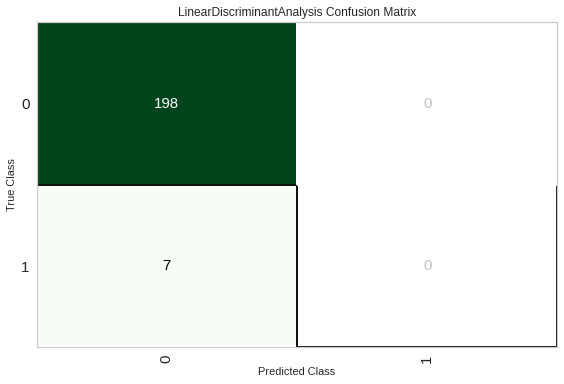

In [101]:
plot_model(lda,plot='confusion_matrix')

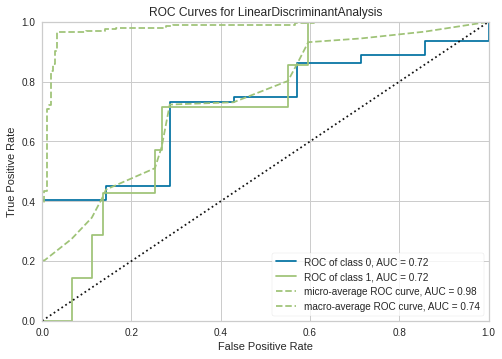

In [102]:
plot_model(lda,plot='auc')

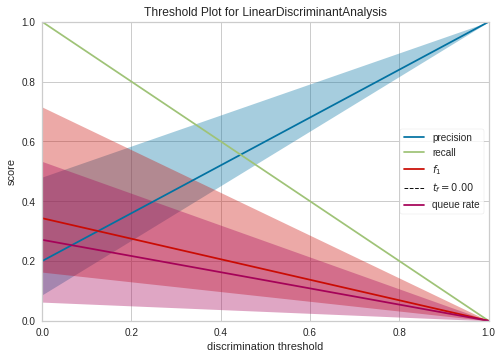

In [103]:
plot_model(lda,plot='threshold')

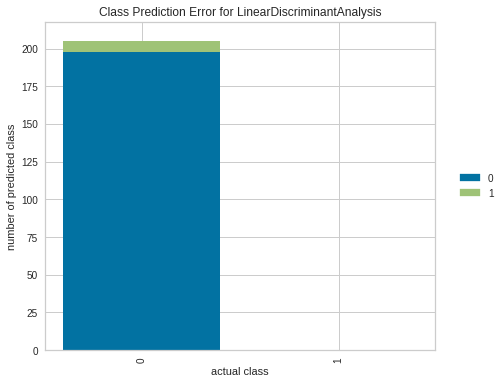

In [104]:
plot_model(lda,plot='error')

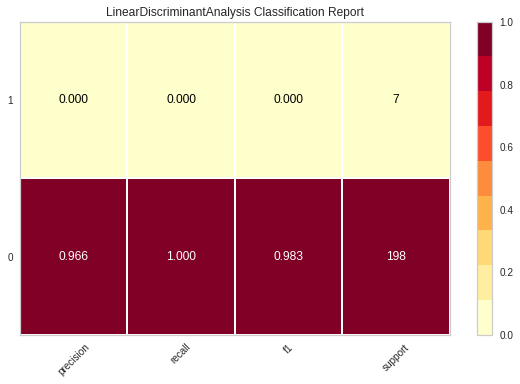

In [105]:
plot_model(lda,plot='class_report')

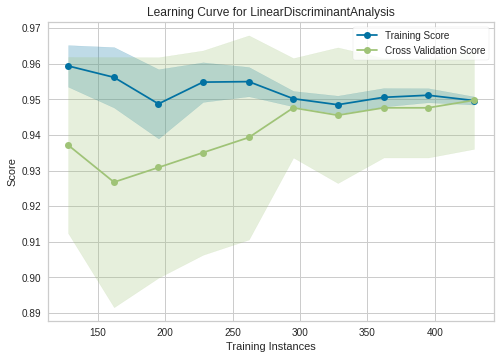

In [106]:
plot_model(lda,plot='learning')

In [107]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [108]:
lda_predictions_holdout = predict_model(lda)

In [113]:
finalize_model(lda)

/home/facu/anaconda3/envs/bienv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/facu/anaconda3/envs/bienv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/facu/anaconda3/envs/bienv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/facu/anaconda3/envs/bienv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = co

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)